In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_excel('Height-Weight.xlsx')

In [4]:
df.head()

,Weight,Height
0,40,152
1,42,150
2,35,146
3,45,156
4,50,155


In [5]:
# scatter plat use to visulize the data points
plt.scatter(df['Weight'], df['Height'])

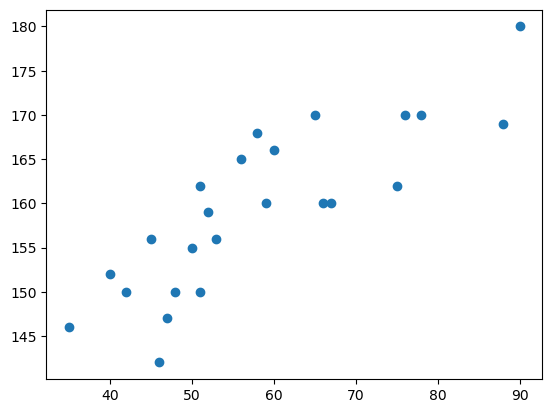

In [6]:
plt.show()

In [7]:
#  finding corelation
df.corr()

,Weight,Height
Weight,1.000000,0.837129
Height,0.837129,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Weight  24 non-null     int64
 1   Height  24 non-null     int64
dtypes: int64(2)
memory usage: 516.0 bytes


In [9]:
df.describe()

,Weight,Height
count,24.000000,24.000000
mean,58.250000,159.375000
std,14.750829,9.361403
min,35.000000,142.000000
25%,47.750000,151.500000
50%,54.500000,160.000000
75%,66.250000,166.500000
max,90.000000,180.000000


In [10]:
# use seaborn for visulization 
import seaborn as sns


In [11]:
sns.pairplot(df)

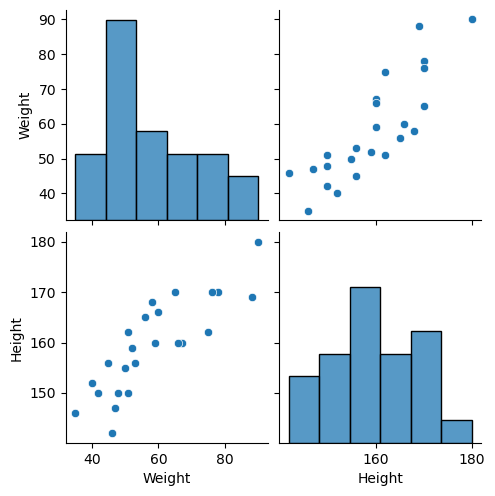

In [12]:
plt.show()

In [13]:
# split data into independent and dependent feature
X = df[['Weight']] # make sure your idependent feature type is Datafream means in 2d array
Y = df['Height']  # your output feature is in series one dimention

In [14]:
np.array(X).shape

(24, 1)

In [15]:
np.array(Y).shape

(24,)

In [16]:
# split data into train test split 
from sklearn.model_selection import train_test_split

In [17]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=42)

In [18]:
X_train.shape

(18, 1)

In [19]:
# standerlization
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()

In [21]:
X_train_std = scaler.fit_transform(X_train)

In [25]:
X_train_std

array([[-0.73501889],
       [-1.15370054],
       [-0.65128256],
       [-0.31633724],
       [-1.73985484],
       [-0.81875522],
       [ 0.18608073],
       [-0.90249155],
       [-0.4838099 ],
       [ 0.85597137],
       [ 1.60959833],
       [-0.23260091],
       [ 1.69333466],
       [ 0.01860807],
       [ 1.86080732],
       [ 0.26981706],
       [ 0.9397077 ],
       [-0.40007357]])

In [26]:
X_test_std = scaler.transform(X_test)

In [27]:
X_test_std

array([[ 0.35355339],
       [ 0.77223504],
       [-1.3211732 ],
       [ 2.69817061],
       [-0.40007357],
       [ 2.86564327]])

In [28]:
#  train our model
#  apply simple linear regression
from sklearn.linear_model import LinearRegression

In [29]:
regression = LinearRegression()

In [30]:
regression.fit(X_train_std,Y_train)

LinearRegression()

In [33]:
# slop
regression.coef_

array([6.30658614])

In [34]:
#  intersept
regression.intercept_

157.66666666666666

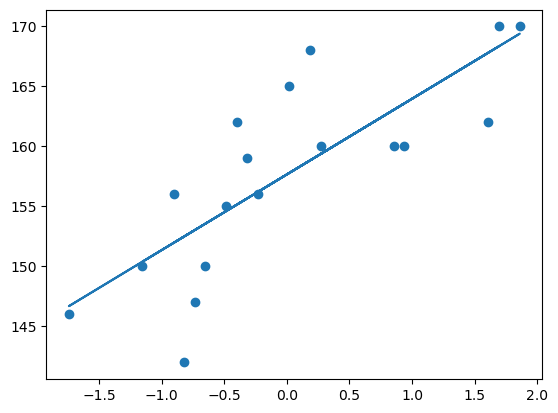

In [38]:
# find best fit line
plt.scatter(X_train_std,Y_train)
plt.plot(X_train_std,regression.predict(X_train_std))
plt.show()

In [39]:
# prediction of test data
X_test_pred = regression.predict(X_test_std)

In [40]:
X_test_pred

array([159.89638158, 162.53683345, 149.3345741 , 174.68291205,
       155.14356821, 175.7390928 ])

In [43]:
X_test

,Weight
8,60
16,65
0,40
18,88
11,51
9,90


In [44]:
Y_test

8     166
16    170
0     152
18    169
11    150
9     180
Name: Height, dtype: int64

## preformance Matrix

In [45]:
# preformance matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [47]:
mse = mean_squared_error(Y_test, X_test_pred)
mae = mean_absolute_error(Y_test, X_test_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

29.49410359141947
5.219933056325028
5.430847410065898


In [48]:
# r squre metrics
from sklearn.metrics import r2_score

In [49]:
score = r2_score(Y_test, X_test_pred)
score

0.7316685040962596

In [51]:
# display adjusted r squre
1 - (1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

0.6645856301203246

## OLS Linear Regression


In [99]:
import statsmodels.api as sm


In [111]:
model1 = sm.OLS(Y_train, X_train_std).fit()

In [116]:
prediction = model1.predict(X_test_std)
print(prediction)

[ 2.22971491  4.87016678 -8.33209257 17.01624538 -2.52309845 18.07242613]


In [87]:
model.summary()

C:\Users\Yash sakhareliya\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Height   R-squared (uncentered):                   0.002
Model:                            OLS   Adj. R-squared (uncentered):             -0.057
Method:                 Least Squares   F-statistic:                            0.02717
Date:                Thu, 31 Oct 2024   Prob (F-statistic):                       0.871
Time:                        15:45:31   Log-Likelihood:                         -116.64
No. Observations:                  18   AIC:                                      235.3
Df Residuals:                      17   BIC:                                      236.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             6.3066     38.258      0.165      0.871     -74.411      87.024
==============================================================================
Omnibus:                        0.059   Durbin-Watson:                   0.002
Prob(Omnibus):                  0.971   Jarque-Bera (JB):                0.093
Skew:                          -0.058   Prob(JB):                        0.954
Kurtosis:                       2.667   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Prediction for New data

In [71]:
a = [[55],[65]]
a  = scaler.transform(a)

C:\Users\Yash sakhareliya\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [72]:
a

array([[-0.06512826],
       [ 0.77223504]])

In [78]:
regression.predict(a)

array([157.25592971, 162.53683345])